# Shortest path vs length

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

<IPython.core.display.Javascript object>

## Directories and files

In [3]:
outdir = "out/"
plotdir = "plot/"
basefiles = [
    "uniform_critical2distances1-100iterations4000",
    "pareto_critical4distances1-100iterations4000",
    "uniform_critical8distances1-100iterations4000",
    "pareto_critical16distances1-100iterations4000",
    "uniform_critical32distances1-100iterations4000",
]

<IPython.core.display.Javascript object>

## Data

In [4]:
params = [
    pd.read_csv(outdir + basefile + "_params.csv", sep="\t") for basefile in basefiles
]
data = [
    pd.read_csv(
        outdir + basefile + "_vs_distance.csv",
        sep="\t",
        index_col=["direction", "distance"],
    )
    for basefile in basefiles
]

distributions = [param["distribution"][0] for param in params]
means = [param["mean"][0] for param in params]
variances = [param["variance"][0] for param in params]
critical_distances = [param["critical_distance"][0] for param in params]

<IPython.core.display.Javascript object>

## Style

In [5]:
plt.style.use(["seaborn-paper", plotdir + ".mplstyle"])
set_matplotlib_formats("pdf", "svg")

width = 7.1
height = width / 3

<IPython.core.display.Javascript object>

## Plot

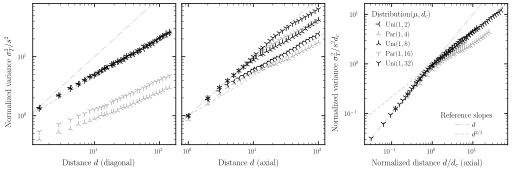

<IPython.core.display.Javascript object>

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharex="col")

distances = np.unique(np.round(10 ** np.linspace(0, 2, 41)))
colors = ["black", "darkgrey"]
markers = ["3", "2", "2", "1", "1"]
zorders = [2, 1, 2, 1, 2]

ylim_min1 = ylim_min2 = float("inf")
ylim_max1 = ylim_max2 = 0
for j, ax in enumerate(axs):
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.tick_params(which="both", direction="in", right=True, top=True)
    if j == 0:
        ax.set_xlabel(r"Distance $d$ (diagonal)")
        ax.set_ylabel(r"Normalized variance $\sigma_T^2/s^2$")
    if j == 1:
        ax.set_xlabel(r"Distance $d$ (axial)")
        ax.set_yticklabels([])
    if j == 2:
        ax.set_xlabel(r"Normalized distance $d/d_c$ (axial)")
        ax.set_ylabel(r"Normalized variance $\sigma_T^2/s^2d_c$")
    for m in range(5):
        n = m
        style = {
            "zorder": zorders[m],
            "color": colors[m % len(colors)],
            "linewidth": 0,
            "marker": markers[m],
            "markersize": 6,
            "markeredgewidth": 0.7,
        }
        x, y = data[n].loc["diag" if j == 0 else "axis", "cost_variance"].loc[
            distances
        ].reset_index().to_numpy().transpose() / (
            critical_distances[n] if j == 2 else 1
        )
        ax.plot(
            x * (np.sqrt(2) if j == 0 else 1),
            y / variances[n],
            **style,
            label=r"{}$({},{})$".format(
                distributions[n][:3].capitalize(), 1, critical_distances[n]
            ),
        )
    xlim = ax.get_xlim()
    if j == 2:
        ylim_min2 = min(ylim_min2, ax.get_ylim()[0])
        ylim_max2 = max(ylim_max2, ax.get_ylim()[1])
    else:
        ylim_min1 = min(ylim_min1, ax.get_ylim()[0])
        ylim_max1 = max(ylim_max1, ax.get_ylim()[1])
    aux_line = np.array([1e-10, 1e10])
    style = {"zorder": 0, "color": "gainsboro", "linewidth": 1}
    (line1,) = ax.plot(aux_line, aux_line, "-.", **style)
    (line2,) = ax.plot(aux_line, aux_line ** (2 / 3), "--", **style)
    ax.set_xlim(xlim)
    if j == 2:
        legend = ax.legend(title=f"Distribution$(\mu,d_c)$", ncol=1)
        legend._legend_box.align = "left"
        legend2 = ax.legend(
            [line1, line2],
            [r"$d$", r"$d^{2/3}$"],
            title="Reference slopes",
            loc="lower right",
            handlelength=2,
            handletextpad=0.4,
        )
        ax.add_artist(legend)

for j, ax in enumerate(axs):
    if j == 2:
        ax.set_ylim((ylim_min2, ylim_max2))
    else:
        ax.set_ylim((ylim_min1, ylim_max1))

fig.savefig(plotdir + "shortest_path_vs_distance.pdf")